In [1]:
import pandas as pd
import numpy  as np

import pickle
 
from pathlib import Path


import matplotlib.pyplot as plt


import sys
sys.path.append("D:/analyze_Pearson_residuals")

from  nru_DE import *
from  plot_tab_utilities import *


pd.set_option('display.max_columns', 5)

In [2]:
#### user specified
data_folder = r"D:/analyze_Pearson_residuals/"

data_subfolder = "10k_heart"

data_path = Path ( data_folder + data_subfolder )

In [3]:
 # output plot
plot_jpg =  data_subfolder + "_Figure_1.jpg"

# input data
counts_pkl = "counts_sparse.pkl" # sparse pandas data frame: cells in columns; genes in rows
nru_dict_pkl =  "nru_dict.pkl"



# path: output plot
plot_dsn = data_path / plot_jpg

# paths: input data
counts_dsn = data_path / counts_pkl
nru_dict_dsn = data_path / nru_dict_pkl   

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]		
		

bins_nz = [ 0, 10, 50, 100, 1000, 10000, 1e6]
labels_nz = ['1-10', '11-50', '51-100', '101-1,000', '1,001-10,000','10,001+']

bins_MSSQ_PR = [  0, 1, 2 , 1e6]
labels_MSSQ_PR = [ '<=1', '1<-2', '>2']

In [5]:
#### compute mean SSQ of Pearson residuals for ALL genes with nonzero counts

df_counts_sparse = pd.read_pickle ( counts_dsn )
print ( ' df_counts_sparse:' )
print ( df_counts_sparse )
print ( '\n type( df_counts_sparse ) ', type ( df_counts_sparse ))
print ( '\n df_counts_sparse.sparse.density: ', df_counts_sparse.sparse.density)

 df_counts_sparse:
                    AAACCCAAGCGAGTCA-1  AAACCCAAGGTCATTC-1  ...  \
ENSEMBL_ID                                                  ...   
ENSMUSG00000051951                   0                   0  ...   
ENSMUSG00000102343                   0                   0  ...   
ENSMUSG00000025900                   0                   0  ...   
ENSMUSG00000025902                   0                   0  ...   
ENSMUSG00000033845                   0                   1  ...   
...                                ...                 ...  ...   
ENSMUSG00000079800                   0                   0  ...   
ENSMUSG00000079808                   0                   0  ...   
ENSMUSG00000095041                   0                   0  ...   
ENSMUSG00000063897                   0                   0  ...   
ENSMUSG00000095742                   0                   0  ...   

                    TTTGTTGTCCCAGGAC-1  TTTGTTGTCTTCGACC-1  
ENSEMBL_ID                                      

In [6]:
#### sparse matrix input to function mean_SSQ_Pearson_residuals
 
counts_scipy_csr_mat = df_counts_sparse.sparse.to_coo().tocsr()
print ( ' counts_scipy_csr_mat:' )
print ( counts_scipy_csr_mat )

 counts_scipy_csr_mat:
  (0, 16)	2
  (0, 317)	1
  (0, 332)	1
  (0, 536)	1
  (0, 579)	1
  (0, 847)	1
  (0, 880)	1
  (0, 1120)	2
  (0, 1265)	1
  (0, 1341)	1
  (0, 1343)	1
  (0, 1914)	1
  (0, 2601)	1
  (0, 2762)	1
  (0, 2882)	1
  (0, 2948)	1
  (0, 3263)	1
  (0, 3685)	1
  (0, 3851)	1
  (0, 4147)	1
  (0, 4198)	1
  (0, 4377)	1
  (0, 4621)	1
  (0, 4791)	1
  (0, 4877)	1
  :	:
  (22620, 5855)	1
  (22620, 5946)	1
  (22620, 5978)	1
  (22620, 6010)	1
  (22620, 6154)	1
  (22620, 6243)	1
  (22620, 6301)	1
  (22620, 6372)	1
  (22620, 6417)	1
  (22620, 6530)	1
  (22620, 6540)	1
  (22620, 6565)	1
  (22620, 6602)	1
  (22620, 6780)	1
  (22620, 6839)	1
  (22620, 6967)	1
  (22620, 7135)	1
  (22620, 7141)	1
  (22620, 7160)	1
  (22620, 7197)	1
  (22620, 7247)	1
  (22620, 7268)	1
  (22620, 7522)	1
  (22620, 7532)	1
  (22620, 7577)	1


In [7]:
df_all_nz_genes = df_counts_sparse.sum ( axis=1 ).to_frame ( name='count' )
counts_GT_0 = ( counts_scipy_csr_mat > 0 ).astype( int )  
df_all_nz_genes['nz_cells'] = np.ravel ( counts_GT_0.sum ( axis=1 ) )

gene_list = df_all_nz_genes.index.values.tolist()
df_all_nz_genes['M_g'] = mean_SSQ_Pearson_residuals ( counts_scipy_csr_mat, gene_list, 1000 )

print ( '\n\n df_all_nz_genes'  )
print ( df_all_nz_genes  )

print ( '\n\n df_all_nz_genes.describe' )
print ( df_all_nz_genes.describe ( percentiles=pctl_list ) )



 df_all_nz_genes
                    count  nz_cells       M_g
ENSEMBL_ID                                   
ENSMUSG00000051951     41        38  0.941698
ENSMUSG00000102343      1         1  1.107494
ENSMUSG00000025900     34         6  3.092294
ENSMUSG00000025902    414       104  3.699895
ENSMUSG00000033845   7962      3195  1.049500
...                   ...       ...       ...
ENSMUSG00000079800      2         2  0.721983
ENSMUSG00000079808     48        45  5.397828
ENSMUSG00000095041   5230      2899  2.648771
ENSMUSG00000063897   2493      1804  1.213629
ENSMUSG00000095742    107       107  0.584800

[22621 rows x 3 columns]


 df_all_nz_genes.describe
              count      nz_cells           M_g
count  2.262100e+04  22621.000000  22621.000000
mean   3.727528e+03    842.123293      2.870697
std    3.099694e+04   1205.981470     43.719367
min    1.000000e+00      1.000000      0.078088
1%     1.000000e+00      1.000000      0.225775
5%     1.000000e+00      1.000000      0.

In [8]:
df_all_nz_genes['nonzero cells'] = pd.cut ( df_all_nz_genes['nz_cells'], bins_nz, labels=labels_nz )
df_all_nz_genes['M_g_category'] = pd.cut ( df_all_nz_genes['M_g'], bins_MSSQ_PR, labels=labels_MSSQ_PR )
pt_nz_vs_Mg = pv_table_noprint_margins ( df_all_nz_genes, 'nonzero cells', 'M_g_category' )

print ( '\n\n Table \n relation between # nonzero_cells  and  mean SSQ of Pearson residuals \n' )
print ( pt_nz_vs_Mg )



 Table 
 relation between # nonzero_cells  and  mean SSQ of Pearson residuals 

M_g_category    <=1   1<-2    >2  Total
nonzero cells                          
1-10           3037   1115  1048   5200
11-50          1061   1195   737   2993
51-100          438    575   291   1304
101-1,000      1598   3523  1260   6381
1,001-10,000   1240   4160  1343   6743
10,001+           0      0     0      0
Total          7374  10568  4679  22621


In [9]:
f = open( nru_dict_dsn, 'rb' )    
nru_dict = pickle.load(f)           
f.close()       

df_gene_stats = nru_dict['df_gene_stats'] [[ 'nz_cells', 'M_g', 'A_g']]

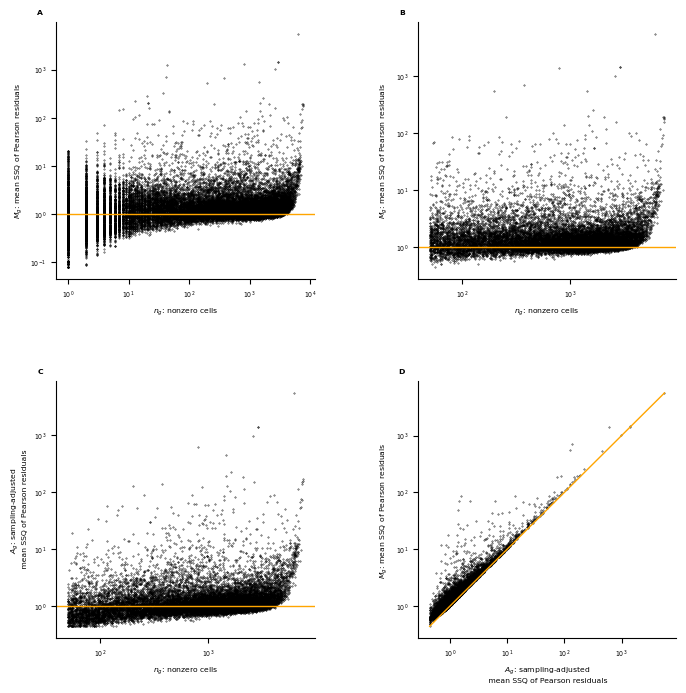

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=( 8, 8) )
  
plot_ax ( df_all_nz_genes, ax1, 'A', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )  
plot_ax ( df_gene_stats, ax2, 'B', 'nz_cells', 'M_g', '$n_g$: nonzero cells',  '$M_g$: mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax3, 'C', 'nz_cells', 'A_g', '$n_g$: nonzero cells', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', line_slope='horizontal'  )
plot_ax ( df_gene_stats, ax4, 'D', 'A_g', 'M_g', '$A_g$: sampling-adjusted \n mean SSQ of Pearson residuals', '$M_g$: mean SSQ of Pearson residuals'  )

plt.subplots_adjust( wspace=0.4, hspace=0.4)

plt.savefig( plot_dsn, transparent=True, dpi=300 )